## Exercise 14: Implement an Oracle for Deutsch-Jozsa Algorithm
1. Create an oracle that represents a constant or balanced function for Deutsch-Jozsa Algorithm
with 3 input qubits.

2. Design a quantum circuit for Deutsch-Jozsa Algorithm using Qiskit and your oracle to deter-
mine if the function is constant or balanced.

3. Test both a constant function and a balanced function.
Expected Outcome: (a) If the oracle is constant, the output will be all zeros. (b) If the oracle is
balanced, the output will not be all zeros.

[Hints:] For a constant function, the output is always the same (0 or 1). For a balanced
function, half of the inputs return 0, and half return 1. Use X gates to simulate a constant
oracle, and CNOT gates to simulate a balanced oracle.

In [1]:
from qiskit import *
from qiskit.primitives import StatevectorSampler  # simulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from numpy import sqrt
import numpy as np
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
def dj_function(num_qubits):

    qc = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2):
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        return qc

    on_states = np.random.choice(
        range(2**num_qubits), 
        2**num_qubits // 2,  
        replace=False, 
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

In [3]:
def compile_circuit(function: QuantumCircuit):
    
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [4]:
from qiskit_aer import AerSimulator

def dj_algorithm(function: QuantumCircuit):
    
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

The function is : balanced
Circuit : 


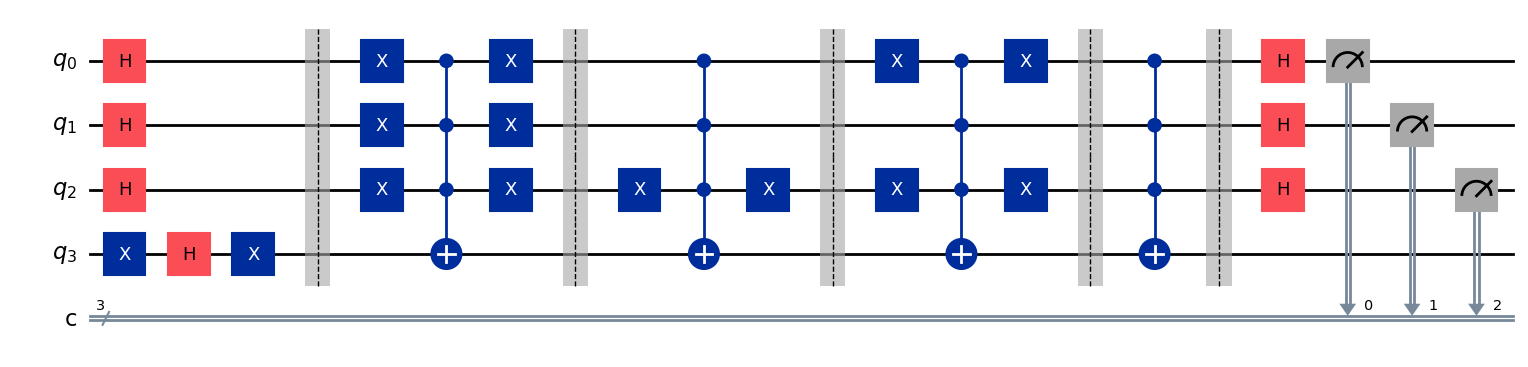

In [6]:
f = dj_function(3)
print(f'The function is : {dj_algorithm(f)}')
print("Circuit : ")
compile_circuit(f).draw('mpl')